# Introduction
## topic
* Python
* Expo

In [1]:
import sys
import os
import os.path as osp

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = ".."
CHAPTER_ID = "Introduction"
NOTEBOOK_TOPIC = "Overview"
IMAGE_PATHS = osp.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID, NOTEBOOK_TOPIC)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    os.makedirs(IMAGE_PATHS, exist_ok=True)
    path = osp.join(IMAGE_PATHS, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import sklearn
import seaborn as sns
import numpy as np
import pandas as pd


# Exploration data analysis

Before touching the model for data, we should to perform exploratoty data analysis, which usually means "looking at data" in several ways, both visually and numerically. We will give some examples below 

In [3]:
!mkdir dataset
!ls

dataset  introduction.ipynb


In [11]:
!pip3 install urllib2

Exception:
Traceback (most recent call last):
  File "/usr/lib/python3/dist-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/usr/lib/python3/dist-packages/pip/commands/install.py", line 353, in run
    wb.build(autobuilding=True)
  File "/usr/lib/python3/dist-packages/pip/wheel.py", line 749, in build
    self.requirement_set.prepare_files(self.finder)
  File "/usr/lib/python3/dist-packages/pip/req/req_set.py", line 380, in prepare_files
    ignore_dependencies=self.ignore_dependencies))
  File "/usr/lib/python3/dist-packages/pip/req/req_set.py", line 554, in _prepare_file
    require_hashes
  File "/usr/lib/python3/dist-packages/pip/req/req_install.py", line 278, in populate_link
    self.link = finder.find_requirement(self, upgrade)
  File "/usr/lib/python3/dist-packages/pip/index.py", line 465, in find_requirement
    all_candidates = self.find_all_candidates(req.name)
  File "/usr/lib/python3/dist-packages/pip/index.py", line 423, in fin

In [2]:
from six.moves import urllib

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

In [4]:
filehandel, _ = urllib.request.urlretrieve(url)

In [5]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

In [6]:
df.head()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   Origin                       Name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Year            398 non-null int64
Origin          398 non-null int64
Name            398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null int64
Name            392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 30.6+ KB


In [10]:
# Summary statistics
df.describe(include='all')

MPG   Cylinders  Displacement  Horsepower       Weight  \
count   392.000000  392.000000    392.000000  392.000000   392.000000   
unique         NaN         NaN           NaN         NaN          NaN   
top            NaN         NaN           NaN         NaN          NaN   
freq           NaN         NaN           NaN         NaN          NaN   
mean     23.445918    5.471939    194.411990  104.469388  2977.584184   
std       7.805007    1.705783    104.644004   38.491160   849.402560   
min       9.000000    3.000000     68.000000   46.000000  1613.000000   
25%      17.000000    4.000000    105.000000   75.000000  2225.250000   
50%      22.750000    4.000000    151.000000   93.500000  2803.500000   
75%      29.000000    8.000000    275.750000  126.000000  3614.750000   
max      46.600000    8.000000    455.000000  230.000000  5140.000000   

        Acceleration        Year      Origin            Name  
count     392.000000  392.000000  392.000000             392  
unique           NaN         NaN         NaN             301  
top              NaN         NaN         NaN  toyota corolla  
freq             NaN         NaN         NaN               5  
mean       15.541327   75.979592    1.576531             NaN  
std         2.758864    3.683737    0.805518             NaN  
min         8.000000   70.000000    1.000000             NaN  
25%        13.775000   73.000000    1.000000             NaN  
50%        15.500000   76.000000    1.000000             NaN  
75%        17.025000   79.000000    2.000000             NaN  
max        24.800000   82.000000    3.000000             NaN

In [11]:
df['Origin'] = df.Origin.replace([1, 2, 3], ['USA', 'Europe', 'Japan'])

In [12]:
df.Origin = df.Origin.astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Year            392 non-null int64
Origin          392 non-null category
Name            392 non-null object
dtypes: category(1), float64(5), int64(2), object(1)
memory usage: 28.0+ KB


In [14]:
df.drop(columns=['Name'], inplace=True)

In [15]:
df.dtypes

MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Year               int64
Origin          category
dtype: object

In [16]:
df.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  Year  \
393  27.0          4         140.0        86.0  2790.0          15.6    82   
394  44.0          4          97.0        52.0  2130.0          24.6    82   
395  32.0          4         135.0        84.0  2295.0          11.6    82   
396  28.0          4         120.0        79.0  2625.0          18.6    82   
397  31.0          4         119.0        82.0  2720.0          19.4    82   

     Origin  
393     USA  
394  Europe  
395     USA  
396     USA  
397     USA

In [17]:
# Create latex table from first 5 rows 
tbl = df[-5:].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrrrrl}
\toprule
  MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year &  Origin \\
\midrule
 27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &     USA \\
 44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 &  Europe \\
 32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &     USA \\
 28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &     USA \\
 31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &     USA \\
\bottomrule
\end{tabular}



Saving figure  auto-mpg-origin-boxplot


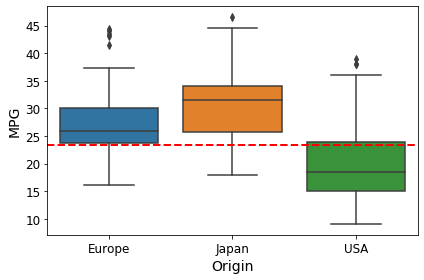

In [27]:
# 1. Plot mpg distribution for cars from different countries of origin
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
save_fig('auto-mpg-origin-boxplot')
plt.show()

Saving figure  auto-mpg-year-boxplot


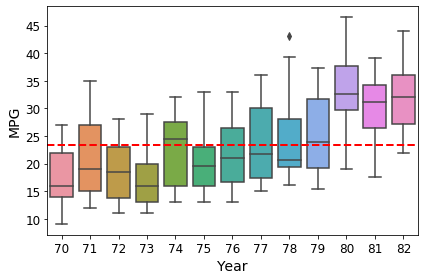

In [29]:
# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
save_fig(os.path.join('auto-mpg-year-boxplot'))
plt.show()

## iris data

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [31]:
np.c_[X[0:3, :], y[0:3]]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

In [32]:
random = np.random.RandomState(seed=42)

In [ ]:
N = X.shape[0]
perm = random.permutation(N)
X = X[perm]
y = y[perm]

In [33]:
df = pd.DataFrame(data=X, columns=['sl', 'sw', 'pl', 'pw'])
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [34]:
df.head()

sl   sw   pl   pw   label
0  5.1  3.5  1.4  0.2  setosa
1  4.9  3.0  1.4  0.2  setosa
2  4.7  3.2  1.3  0.2  setosa
3  4.6  3.1  1.5  0.2  setosa
4  5.0  3.6  1.4  0.2  setosa

In [35]:
df.describe(include='all')

sl          sw          pl          pw      label
count   150.000000  150.000000  150.000000  150.000000        150
unique         NaN         NaN         NaN         NaN          3
top            NaN         NaN         NaN         NaN  virginica
freq           NaN         NaN         NaN         NaN         50
mean      5.843333    3.057333    3.758000    1.199333        NaN
std       0.828066    0.435866    1.765298    0.762238        NaN
min       4.300000    2.000000    1.000000    0.100000        NaN
25%       5.100000    2.800000    1.600000    0.300000        NaN
50%       5.800000    3.000000    4.350000    1.300000        NaN
75%       6.400000    3.300000    5.100000    1.800000        NaN
max       7.900000    4.400000    6.900000    2.500000        NaN

Saving figure  iris-scatterplot


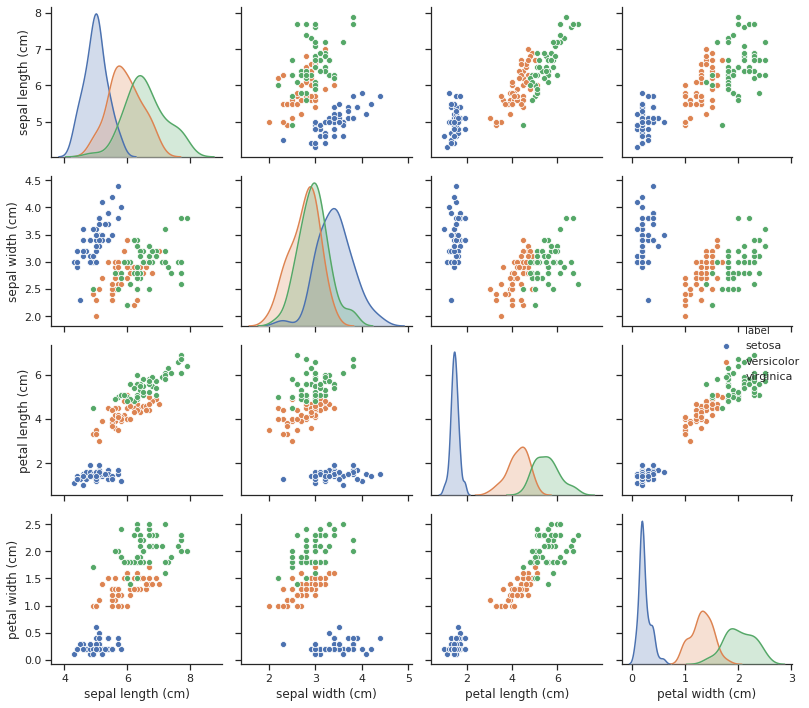

In [38]:
# 2d scatterplot
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
# Make a dataframe with nicer labels for printing
#iris_df = sns.load_dataset("iris")
iris_df = df.copy()
iris_df.columns = iris['feature_names'] + ['label'] 
g = sns.pairplot(iris_df, vars = iris_df.columns[0:4] , hue="label")
save_fig("iris-scatterplot")
plt.show()

In [37]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

## Boston housing dataset 

In [40]:
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

df = pd.DataFrame(X)
df.columns = boston.feature_names
df['MEDV'] = y.tolist()

df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

Saving figure  boston_histogram


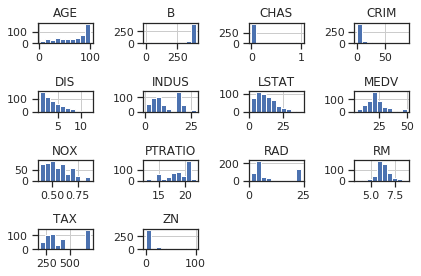

In [43]:
# plot marginal histograms of each column (13 features, 1 response)
df.hist()
save_fig('boston_histogram')
plt.show()

Saving figure  boston-housing-scatter


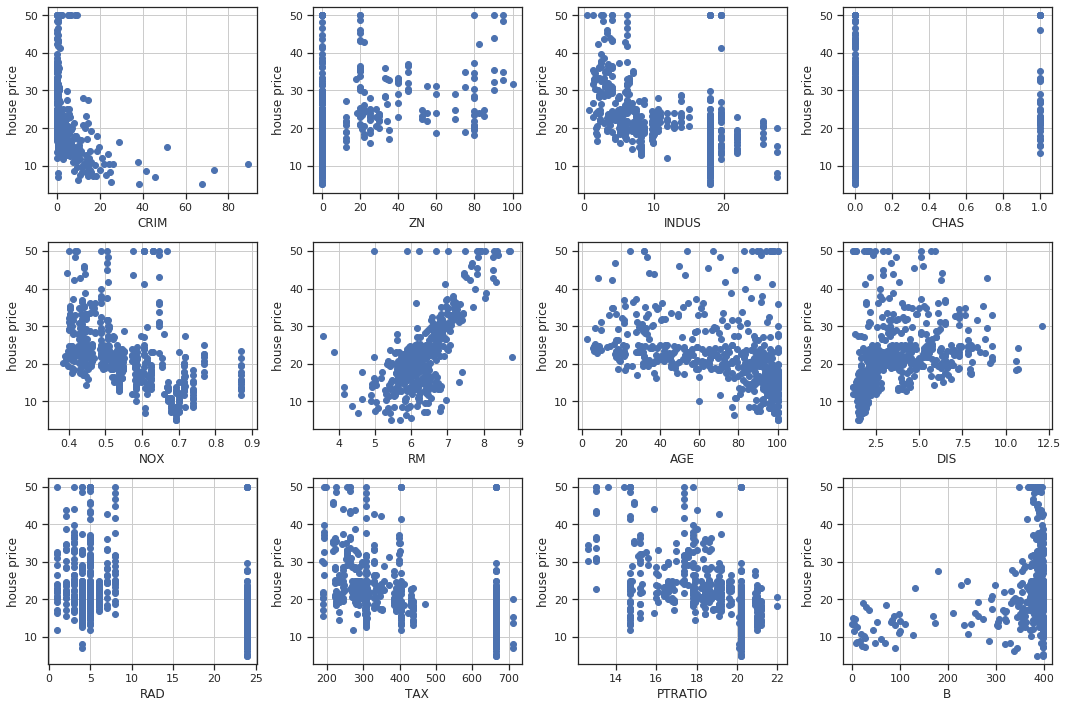

In [45]:
# scatter plot of respone vs each feature
nrows = 3; ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.clf()
for i in range(12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X[:, i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()

save_fig("boston-housing-scatter")
plt.show()

# Data preprocessing
### Standardizing numeric features in Boston housing

In [49]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [50]:
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [51]:
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

Saving figure  boston-housing-scatter-scaled


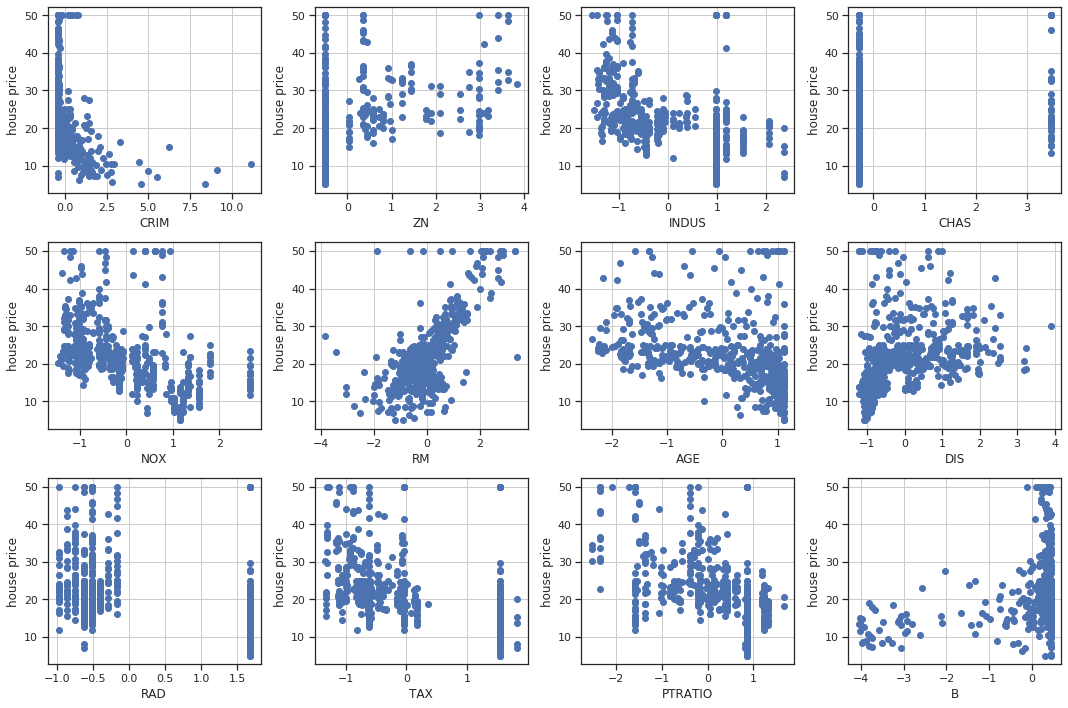

In [52]:
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X_scaled[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
    
save_fig("boston-housing-scatter-scaled")
plt.show()

In [65]:
# Convert origin factor to integer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [63]:
label = ['a', 'b', 'a', 'c', 'c', 'a', 'b', 'a', 'b', 'c', 'a', 'b', 'a', 'c', 'b', 'a', 'c', 'a', 'b']

In [66]:
origin_int = encoder.fit_transform(label)

In [67]:
origin_int

array([0, 1, 0, 2, 2, 0, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 1])

In [68]:
# Convert integer encoding to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

origin_onehot_sparse = encoder.fit_transform(origin_int.reshape(-1,1)) # Sparse array
origin_onehot_dense = origin_onehot_sparse.toarray()
print(origin_onehot_dense[-5:,:])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


/home/anhlt/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [69]:
# may combine above the processing method into a pipeline
'''
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('str2int', LabelEncoder()),
    ('int2onehot', OneHotEncoder())
])
origin_onehot2 = pipeline.fit_transform(df['Origin'])
'''

"\nfrom sklearn.pipeline import Pipeline\npipeline = Pipeline([\n    ('str2int', LabelEncoder()),\n    ('int2onehot', OneHotEncoder())\n])\norigin_onehot2 = pipeline.fit_transform(df['Origin'])\n"

# Feature crosses for Autompg

## Patsy
Patsy is a Python library for describing statistical models (especially linear models, or models that have a linear component) and building design matrices. Patsy brings the convenience of R “formulas” to Python.

In [2]:
# Simple example of feature cross
import patsy

cylinders = pd.Series([4,   2,    3,   2,   4], dtype='int')
colors = pd.Series(['R', 'R', 'G', 'B', 'R'], dtype='category')
origin = pd.Series(['U', 'J', 'J', 'U', 'U'], dtype='category')
data = {'Cyl': cylinders, 'C': colors, 'O': origin}
df0 = pd.DataFrame(data=data)
# print(df0)

df_cross0 = patsy.dmatrix('Cyl + C + O + C:O', df0, return_type='dataframe')
df_cross0.tail()

Intercept  C[T.G]  C[T.R]  O[T.U]  C[T.G]:O[T.U]  C[T.R]:O[T.U]  Cyl
0        1.0     0.0     1.0     1.0            0.0            1.0  4.0
1        1.0     0.0     1.0     0.0            0.0            0.0  2.0
2        1.0     1.0     0.0     0.0            0.0            0.0  3.0
3        1.0     0.0     0.0     1.0            0.0            0.0  2.0
4        1.0     0.0     1.0     1.0            0.0            1.0  4.0

# Logistic regression

In this section, we illustrate how to perform logistic regression using scikit-learn. We apply it to the iris dataset, both 2-class and 3-class version. Our code is based on Aurelien Geron's code from https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()


# Initially use 1 feature, 2 classes
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0'

#log_reg = LogisticRegression(solver="lbfgs", penalty='none')
# Penalty='none' introduced in sklearn 0.21.
# For older versions, use this method:
log_reg = LogisticRegression(solver="lbfgs", C=1000)
log_reg.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Deep learning

To implement more advanced models, we need to move beyond scikit-learn. In particular, it is very useful to have a way to compose differentiable functions into more complex functions, and then to be able to use automatic differentiation ("autodiff") to compute gradients, which we can pass to an optimizer, to fit the function to data. This is sometimes called "differentiable programming", although the term "deep learning" is more commonly used (the term "deep" refers to having many layers of differentiable functions stacked on top of each other, and the term "learning" refers to optimization).

It is also useful to have a library that can compile such computation graphs so as to exploit hardware accelerators, such as GPUs. (Some libraries also support distributed computation, but we will not need use this feature in this book.) We list a few popular libraries below.

For a good book on TF 2.0, see Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow v2 by Aurelion Geron. For a good list of PyTorch tutorials, see https://github.com/ritchieng/the-incredible-pytorch or this course from Udacity. For a good book on MXNet, see Dive into deep learning.


Name 	Functionality
Tensorflow 2.0 	Accelerated NumPy-like library, autodiff, Keras API.
Pytorch 1.0 	Similar to TF 2.0
MXNet 	Similar to TF 2.0, Gluon API.
JAX 	Accelerated version of NumPy, flexible autodiff library, flexible JIT compiler, minimal DL library, functional (stateless) API
Tensorflow 2.0 / keras

In this section, we give a few examples of how to fit multilayer perceptrons (MLPs) using the Keras interface to TF 2.0.

# Tensorflow 2.0 / keras

In [3]:
import tensorflow as tf
from tensorflow import keras
from time import time
print(tf.__version__)

print(tf.test.is_gpu_available())
print(tf.test.gpu_device_name())

1.14.0
False

